<a href="https://colab.research.google.com/github/0tv0renakniga/dsc_207_week_7/blob/main/week7_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 Study Notebook

# UC San Diego OMDS DSC 207

### Importing Libraries

We will start by importing any relevant Python libraries. The code block below should be the place where you import all regular Python libraries (such as pandas, numpy, matplotlib, etc.)

In [53]:
# Load libraries as relevant for this assignment
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Part 1: Regression (Consumer Goods Data and Investments Data)

We will perform linear regression to use our financial data to predict projected investments.

### 1.1 Datasets
We'll be using the a merged [dataset](https://drive.google.com/file/d/17tyrmrUQYaiia3zY6YgQy8LIUuM37hrd/view?usp=sharing) consisting of consumer_goods and investments and try to predict the Percentage Investment using Linear Regression. The dataset can be found here. Load this dataset into a dataframe `goods_investments` and have a look at it using head, info and describe methods. [0.5 pt]<br>
<br><br>

In [24]:
# Set the working directory
os.chdir('/home/scotty/dsc_207_week_7')

# Load the data using pandas read_csv method
goods_investments = pd.read_csv('goods_investments.csv')

# Display the first 5 rows and all columns of the dataset using the pandas head method
print(goods_investments.head())

# Display data types and non-null values for each column using the pandas info method
goods_investments.info()

# Display the summary statistics for the dataset using the pandas describe method
goods_investments.describe()

   Store Number  Convenience  Shopping  Specialty  Unsought   Other  \
0          1101       301121     42712     169038     89371  296474   
1          1101         9473       326       5276      3871    8943   
2          1103        99476      9576      45791     44109  109323   
3          1103        78919      6537      41600     30782   81220   
4          1103        30401      1588      17791     11022   29601   

   Percentage Investment  
0                   18.8  
1                   18.8  
2                   15.8  
3                   15.8  
4                   15.8  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4636 entries, 0 to 4635
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store Number           4636 non-null   int64  
 1   Convenience            4636 non-null   int64  
 2   Shopping               4636 non-null   int64  
 3   Specialty              4636 non-null   i

,Store Number,Convenience,Shopping,Specialty,Unsought,Other,Percentage Investment
count,4636.000000,4.636000e+03,4636.000000,4.636000e+03,4.636000e+03,4.636000e+03,4636.000000
mean,29981.877696,4.132596e+04,3616.043788,1.902213e+04,1.868779e+04,4.138169e+04,15.041393
std,15136.976829,1.154726e+05,12116.007845,5.179389e+04,6.093743e+04,1.173996e+05,5.674065
min,1101.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.000000e+00,3.500000
25%,17203.000000,5.914750e+03,359.750000,2.490500e+03,1.954000e+03,5.801000e+03,10.900000
50%,29169.000000,1.318200e+04,894.500000,6.455500e+03,4.965000e+03,1.300250e+04,14.600000
75%,42133.000000,3.341150e+04,2518.250000,1.577825e+04,1.357300e+04,3.311100e+04,17.800000
max,55141.000000,3.030964e+06,293958.000000,1.476387e+06,1.842859e+06,2.824311e+06,48.600000


### 1.2 Train and test split [1 pt]
1. Shuffle your data (optional)
2. Partition it into an 80%/20% train/test split using train_test_split.<br>

Note: The store number column would not likely contribute towards a prediction. Hence, it would be better to drop the column before splitting.

X_train and X_test should have these columns: `Convenience`, `Shopping`, `Specialty`, `Unsought`, `Other`<br>
y_train and y_test should have this column: `Percentage Investment`<br>
<br><br>

In [25]:
# Drop Store Number column
goods_investments = goods_investments.drop('Store Number', axis=1)

# Shuffle the data to prevent model overfitting (learning order of data)
shuffled_data = goods_investments.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the feature columns and target column
feature_columns = ['Convenience', 'Shopping', 'Specialty', 'Unsought', 'Other']
target_column = 'Percentage Investment'

# Define X_data and y_target
X_data = shuffled_data[feature_columns]
y_target = shuffled_data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=42)

#### 1.3 Print out the shapes of X_train, X_test, y_train, y_test [0.5 pt]

In [26]:
# Print the shape of the training and testing datasets  
data_shapes = f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}"
print(data_shapes)

X_train shape: (3708, 5), X_test shape: (928, 5), y_train shape: (3708,), y_test shape: (928,)


#### 1.4 Fit a regressor

Create a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">linear regression model</a> and fit it to your training dataset. [0.5 pt]<br>


In [27]:
# Create a linear regression model and fit it using the training data
investment_regression = LinearRegression().fit(X_train, y_train)

#### 1.5 Use your model to predict on your test set. [0.5 pt]


In [28]:
# Make predictions on the test data
investment_predictions = investment_regression.predict(X_test)

#### 1.6 Report the RMSE of the prediction. (The [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) library is useful. Note - We want to find the root of MSE). [0.5 pt]

In [36]:
# Calculate the mean squared error of the score
mse = mean_squared_error(y_test, investment_predictions)
rmse = np.sqrt(mse)
print(f'Mean Squared Error(MSE): {mse:.2f}')
print(f'Root Mean Squared Error(RMSE): {rmse:.2f}')

Mean Squared Error(MSE): 33.06
Root Mean Squared Error(RMSE): 5.75


<!-- BEGIN QUESTION -->

#### 1.7 Print the intercept value of the linear regression, along with the coefficients of each of the input features. [1 pt]

In [49]:
# Print the intercept value
intercept = investment_regression.intercept_
print(f'Intercept: {intercept:.2f}')

Intercept: 15.17


In [50]:
# Print the coefficients of each input feature
coefficients = pd.DataFrame(investment_regression.coef_, X_train.columns, columns=['Coefficient'])
print(f"Coeffcients for each of the input features:\n\n{coefficients}")

Coeffcients for each of the input features:

             Coefficient
Convenience     0.000073
Shopping        0.000254
Specialty      -0.000084
Unsought       -0.000096
Other          -0.000016


# Part 2: Classification

### **Instructions**

Out of the three classifiers taught this week (decision trees, logistic regression, Naive Bayes), you must implement two of them.

You will follow the steps for each classifier model that you implement:
- Defining the model.
- Fit the classifier defined in step 4 on the training data (X_train, y_train).
- Generate a list predictions_train containing all the grade predictions for the train set.
- Generate a list predictions_test containing all the grade predictions for the test set.
- Calculate the accuracy of your model on the train and test sets.

### The Dataset

For your classification tasks, you will work on weather data. The goal is to classify the weather being high_humidity or not based on other weather conditions.

Here is a pre-processed version of the [dataset](https://drive.google.com/file/d/11mKR0uGIk8ZCG2jmk0m_GxiYPLq6rAfc/view?usp=share_link)


### Load Data

Load the dataset into a dataframe `df`. The url to retrieve the data from can be found here: https://raw.githubusercontent.com/dsc207rfall2023/fa23course-dsc207r/main/assignments/Week%207/input_data/humidity.csv. Read this data into a pandas dataframe `df`

In [52]:
# Load the data using pandas read_csv method
df = pd.read_csv('humidity.csv')

<!-- END QUESTION -->

### Importing Machine Learning Libraries

You will need to import machine learning libraries of your choice for performing different tasks in this assignment. Update this cell with each import and re-run it to update your notebook.

In [55]:
# Import relevant machine learning libraries in this cell as relevant for this assignment
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<!-- BEGIN QUESTION -->

### 2.1 Understanding the Data

##### Get information about the various columns of the dataframe using head, describe and info methods of dataframes. [1 pt]

In [54]:
# Display the first 5 rows and all columns of the dataset using the pandas head method
print(df.head())

# Display data types and non-null values for each column using the pandas info method
df.info()

# Display the summary statistics for the dataset using the pandas describe method
df.describe()


   air_pressure_9am  air_temp_9am  avg_wind_direction_9am  avg_wind_speed_9am  \
0        918.060000     74.822000              271.100000            2.080354   
1        917.347688     71.403843              101.935179            2.443009   
2        923.040000     60.638000               51.000000           17.067852   
3        920.502751     70.138895              198.832133            4.337363   
4        921.160000     44.294000              277.800000            1.856660   

   max_wind_direction_9am  max_wind_speed_9am  rain_accumulation_9am  \
0              295.400000            2.863283                    0.0   
1              140.471548            3.533324                    0.0   
2               63.700000           22.100967                    0.0   
3              211.203341            5.190045                    0.0   
4              136.500000            2.863283                    8.9   

   rain_duration_9am  high_humidity_label  
0                0.0                

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,high_humidity_label
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,918.903180,65.022609,142.306756,5.485793,148.480424,6.999714,0.182023,266.393697,0.497180
std,3.179040,11.168033,69.149472,4.534427,67.154911,5.590790,1.534493,1503.092216,0.500227
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,0.000000
25%,916.595376,57.398000,65.979244,2.245529,76.335351,3.064608,0.000000,0.000000,0.000000
50%,918.942281,65.778479,165.937461,3.869906,176.350000,4.943637,0.000000,0.000000,0.000000
75%,921.169054,73.530872,191.100000,7.264463,201.125000,8.747888,0.000000,0.000000,1.000000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,1.000000


<!-- BEGIN QUESTION -->

### 2.2 Generate a [histogram graph for counts for all values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).
Set the figsize parameter to a suitable size for readability. You need not plot each histogram individually. Instead use the provided reference to plot the distributions together like the sample below. [0.5 pt]

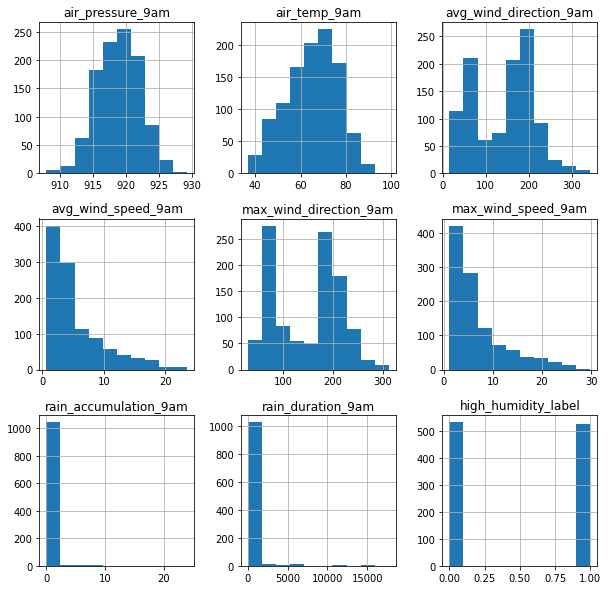

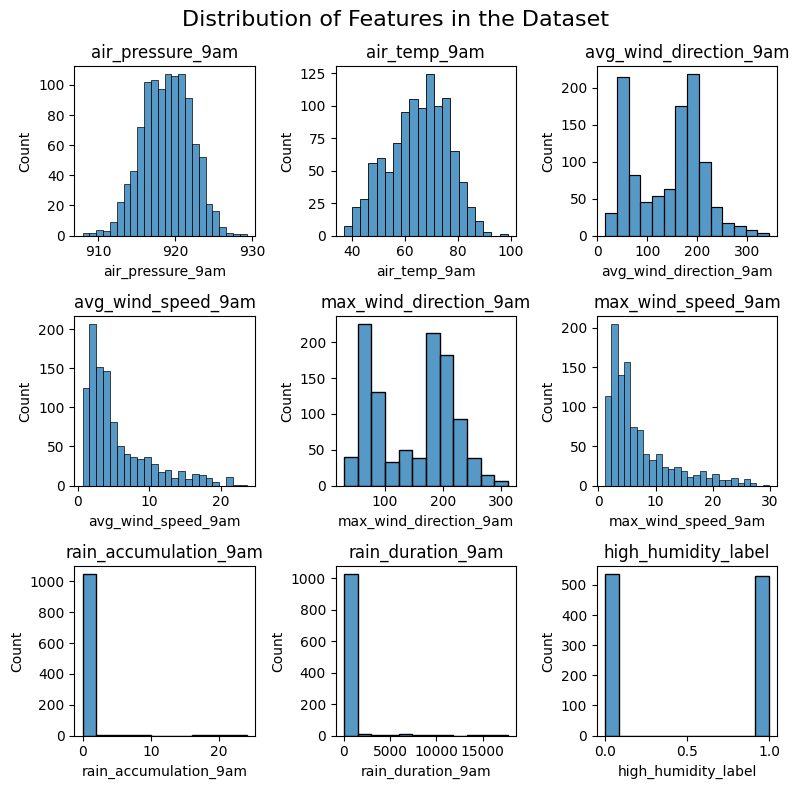

In [80]:
# Create subplots for each feature to visualize the distribution of the data
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))

# Flatten the axes for easy iteration
axes1 = axes1.flatten()

# Add a title to the figure
fig1.suptitle('Distribution of Features in the Dataset', fontsize=16)

# Loop through all the columns and plot the distribution of each feature
for n_axes, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes1[n_axes])
    axes1[n_axes].set_title(f'{col}')

# Display the plots
fig1.tight_layout()

<!-- END QUESTION -->

### 2.3 Preparing the input fields and target variable [0.5 pt]

1. We want to create a dataframe of features `X` without the labels.
2. We want to remove the target variable `label` and store it another dataframe `y`.



In [61]:
# Shuffle the data to prevent model overfitting (learning order of data)
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# feature data
X = df_shuffled.drop('high_humidity_label', axis=1)
# target data
y = df_shuffled['high_humidity_label']

### 2.4 Preparing train and test sets [0.5 pt]

Split data into training(80%) and test(20%) set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with some value of random_state.

After this step, you should have 4 dataframes - `X_train, X_test, y_train, y_test`.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##2.5 Classifier #1

### 2.5.1 Defining the first classifier model [0.5 pt]

Choose either a decision tree, logistic regression, or Naive Bayes model.
Import and create a classifier model called `clf_1`.

In [63]:
# Create a decision tree classifier
clf_1 = DecisionTreeClassifier(random_state=42)

### 2.5.2 Fit the classifier on the training data (X_train, y_train) [0.5 pt]

In [65]:
# Fit training data(X_train, y_train) using the decision tree classifier
clf_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 2.5.3 Generate predictions for train

Generate a list `predictions_train` containing all the grade predictions for the train set [0.5 pt]

In [66]:
# Make predictions on the training data(X_train) using the decision tree classifier
predictions_train1 = clf_1.predict(X_train)

### 2.5.4 Generate predictions for train

Generate a list `predictions_test` containing all the grade predictions for the test set [0.5 pt]

In [67]:
# Make predictions on the test data(X_test) using the decision tree classifier
predictions_test1 = clf_1.predict(X_test)

<!-- BEGIN QUESTION -->

### 2.5.5 Calculate accuracy

Find the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of **train** set for your model using above predictions. (Make sure you have imported the library) [0.5 pt]

In [68]:
# Calculate the accuracy of the model on the training and test data
accuracy_train1 = accuracy_score(y_train, predictions_train1)

# print the accuracy of the model on the training data
print(f"Accuracy on the training data: {accuracy_train1:.2f}")

Accuracy on the training data: 1.00


<!-- END QUESTION -->

Find the accuracy of test set for your model using above predictions. [0.5 pt]

In [69]:
# Calculate the accuracy of the model on the test data
accuracy_test1 = accuracy_score(y_test, predictions_test1)

# print the accuracy of the model on the test data
print(f"Accuracy on the test data: {accuracy_test1:.2f}")

Accuracy on the test data: 0.78


<!-- BEGIN QUESTION -->

Which accuracy (test or train) is higher? Why? [0.5 pt]


##### **Answer**
| test     | training |
|----------|----------|
| 0.78     | 1.00     |

*Table1: Accuracy of test and traing data*

From Table 1, we see that the  training accuracy is higher than the test data. We are overfitting the model when comparing the model accuracy to the data it was trained on. Therefore, the accuracy of the model on the training data will be higher.





## 2.6 Classifier #2

### 2.6.1 Defining the second classifier model [0.5 pt]

Choose either a decision tree, logistic regression, or Naive Bayes model. This must be a different model from your first classifier! Import and create a classifier model called `clf_12`.

In [70]:
# Create a logistic regression classifier
clf_2 = LogisticRegression(random_state=42, max_iter=1000)

### 2.6.2 Fit the classifier on the training data (X_train, y_train) [0.5 pt]

In [71]:
# Fit training data(X_train, y_train) using the logistic regression classifier
clf_2.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### 2.6.3 Generate predictions for train

Generate a list `predictions_train` containing all the grade predictions for the train set [0.5 pt]

In [72]:
# Make predictions on the training data(X_train) using the logistic regression classifier
predictions_train2 = clf_2.predict(X_train)

### 2.6.4 Generate predictions for train

Generate a list `predictions_test` containing all the grade predictions for the test set [0.5 pt]

In [73]:
# Make predictions on the test data(X_test) using the logistic regression classifier
predictions_test2 = clf_2.predict(X_test)

<!-- BEGIN QUESTION -->

### 2.6.5 Calculate accuracy

Find the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of **train** set for your model using above predictions. (Make sure you have imported the library) [0.5 pt]

In [77]:
# Calculate the accuracy of the model on the training data
accuracy_train2 = accuracy_score(y_train, predictions_train2)

# Print the accuracy of the model on the training data
print(f"Accuracy on the training data: {accuracy_train2:.5f}")

Accuracy on the training data: 0.79906


<!-- END QUESTION -->

Find the accuracy of test set for your model using above predictions. [0.5 pt]

In [76]:
# Calculate the accuracy of the model on the test data
accuracy_test2 = accuracy_score(y_test, predictions_test2)

# Print the accuracy of the model on the test data
print(f"Accuracy on the test data: {accuracy_test2:.5}")

Accuracy on the test data: 0.80282


<!-- BEGIN QUESTION -->

Which accuracy (test or train) is higher? Why? [0.5 pt]


##### **Answer**
| test     | training |
|----------|----------|
| 0.80282  |  0.79906 |

*Table1: Accuracy of test and traing data*

From Table 1, we see that the  test accuracy is higher than the test data. Logistic regression is a simpler model, this simplicity helps the model predict test data better.





## 2.7: Video

Create a video with the following components:
* Explain why you chose the two classifier models you chose in part 2. [1 pt]
* Explain the steps you took to code each model briefly (creating the model, fitting the classifier to the data, generating predictions, calculating accuracy). Also explain how you generated train/test sets. [2 pts]
* Compare the results of both the models based on your generated accuracies. [1 pt]


Additionally (and this is important), ensure you follow the format the video submission. If one of these criteria is missing, we will not grade the video.
* Show some form of ID at the start of the video so we know who you are.
* Show your code in the video by screensharing.
* Show your face in the video.



LINK TO YOUR VIDEO HERE: no video needed per question @88: "Video for Week 7" on piazza

# Submission

Before you submit your notebook, ensure that you've run all the cells sequentially to display images, graphs, and outputs correctly. Take the time to review your solutions and evaluate using the public test cases. Once you're satisfied, save your notebook by navigating to "File" in the Jupyter Notebook menu and selecting "Save" or using the keyboard shortcut (usually Ctrl + S or Cmd + S).

To submit, export your notebook as an .ipynb file. Ensure it's saved with the same name as the assignment. Then, upload this .ipynb file to Gradescope. Remember to submit the correct version.

Please save your work before exporting it, and if you encounter any technical issues or have questions about the submission process, reach out to the course staff for assistance